# **Problem dan Goals**

Berdasarkan analisis data Global Economy Indicators, berikut insights utama:

Problems:
1. Kesenjangan signifikan antar negara dalam indikator ekonomi
2. Korelasi kuat antara tata kelola (governance) dengan kinerja ekonomi
3. Beberapa negara memiliki skor sangat rendah di keamanan dan kebebasan personal

Goals:
1. Mengelompokkan negara berdasarkan karakteristik ekonomi (menggunakan K-means clustering)
2. Mengidentifikasi faktor-faktor yang paling berpengaruh terhadap skor rata-rata ekonomi
3. Menemukan pola dan hubungan antar indikator untuk pembuatan kebijakan

Dari analisis clustering:
- Optimal cluster = 3 (berdasarkan elbow method dan silhouette score)
- Negara dapat dikelompokkan menjadi: ekonomi maju, berkembang, dan tertinggal

Temuan ini dapat membantu pembuat kebijakan untuk:
- Mengidentifikasi area prioritas perbaikan
- Merancang intervensi berdasarkan karakteristik cluster
- Menetapkan target pembangunan yang realistis



# **Dataset**
Jumlah Baris: 167

Jumlah Kolom: 14

Numerical Features (Fitur Numerik):
* AveragScore,
* SafetySecurity,
* PersonelFreedom,
* Governance, SocialCapital,
* InvestmentEnvironment,
* EnterpriseConditions,
* MarketAccessInfrastructure,
* EconomicQuality,
* LivingConditions,
* Health,
* Education,
* NaturalEnvironment

Categorical Features (Fitur Kategorikal):

*  Country






# **Codingan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


In [ ]:
df.describe()

,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,58.056228,67.242515,56.829401,50.360299,54.468024,53.013653,54.791677,55.019701,51.568683,69.803293,68.624910,58.723772,56.231737
std,13.309964,17.542279,19.914638,17.747092,10.350639,16.743723,12.876166,15.849004,13.427811,19.752677,11.166266,19.679023,9.061262
min,30.400000,16.540000,16.160000,13.090000,23.010000,21.690000,20.500000,24.230000,24.460000,19.210000,31.950000,16.780000,33.670000
25%,47.770000,59.290000,39.650000,37.470000,47.820000,40.765000,45.830000,40.055000,41.295000,55.830000,60.595000,44.355000,50.265000
50%,57.530000,68.930000,57.170000,47.510000,54.390000,51.250000,53.520000,56.590000,50.060000,74.770000,71.380000,61.930000,55.540000
75%,66.860000,80.560000,72.865000,60.965000,60.610000,64.640000,62.760000,69.060000,62.555000,86.975000,77.340000,74.130000,61.940000
max,84.550000,96.320000,94.100000,90.410000,82.560000,84.990000,83.840000,85.750000,80.100000,95.860000,86.890000,91.440000,78.740000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     167 non-null    object 
 1   AveragScore                 167 non-null    float64
 2   SafetySecurity              167 non-null    float64
 3   PersonelFreedom             167 non-null    float64
 4   Governance                  167 non-null    float64
 5   SocialCapital               167 non-null    float64
 6   InvestmentEnvironment       167 non-null    float64
 7   EnterpriseConditions        167 non-null    float64
 8   MarketAccessInfrastructure  167 non-null    float64
 9   EconomicQuality             167 non-null    float64
 10  LivingConditions            167 non-null    float64
 11  Health                      167 non-null    float64
 12  Education                   167 non-null    float64
 13  NaturalEnvironment          167 non

In [ ]:
df.isnull().sum()

,0
Country,0
AveragScore,0
SafetySecurity,0
PersonelFreedom,0
Governance,0
SocialCapital,0
InvestmentEnvironment,0
EnterpriseConditions,0
MarketAccessInfrastructure,0
EconomicQuality,0


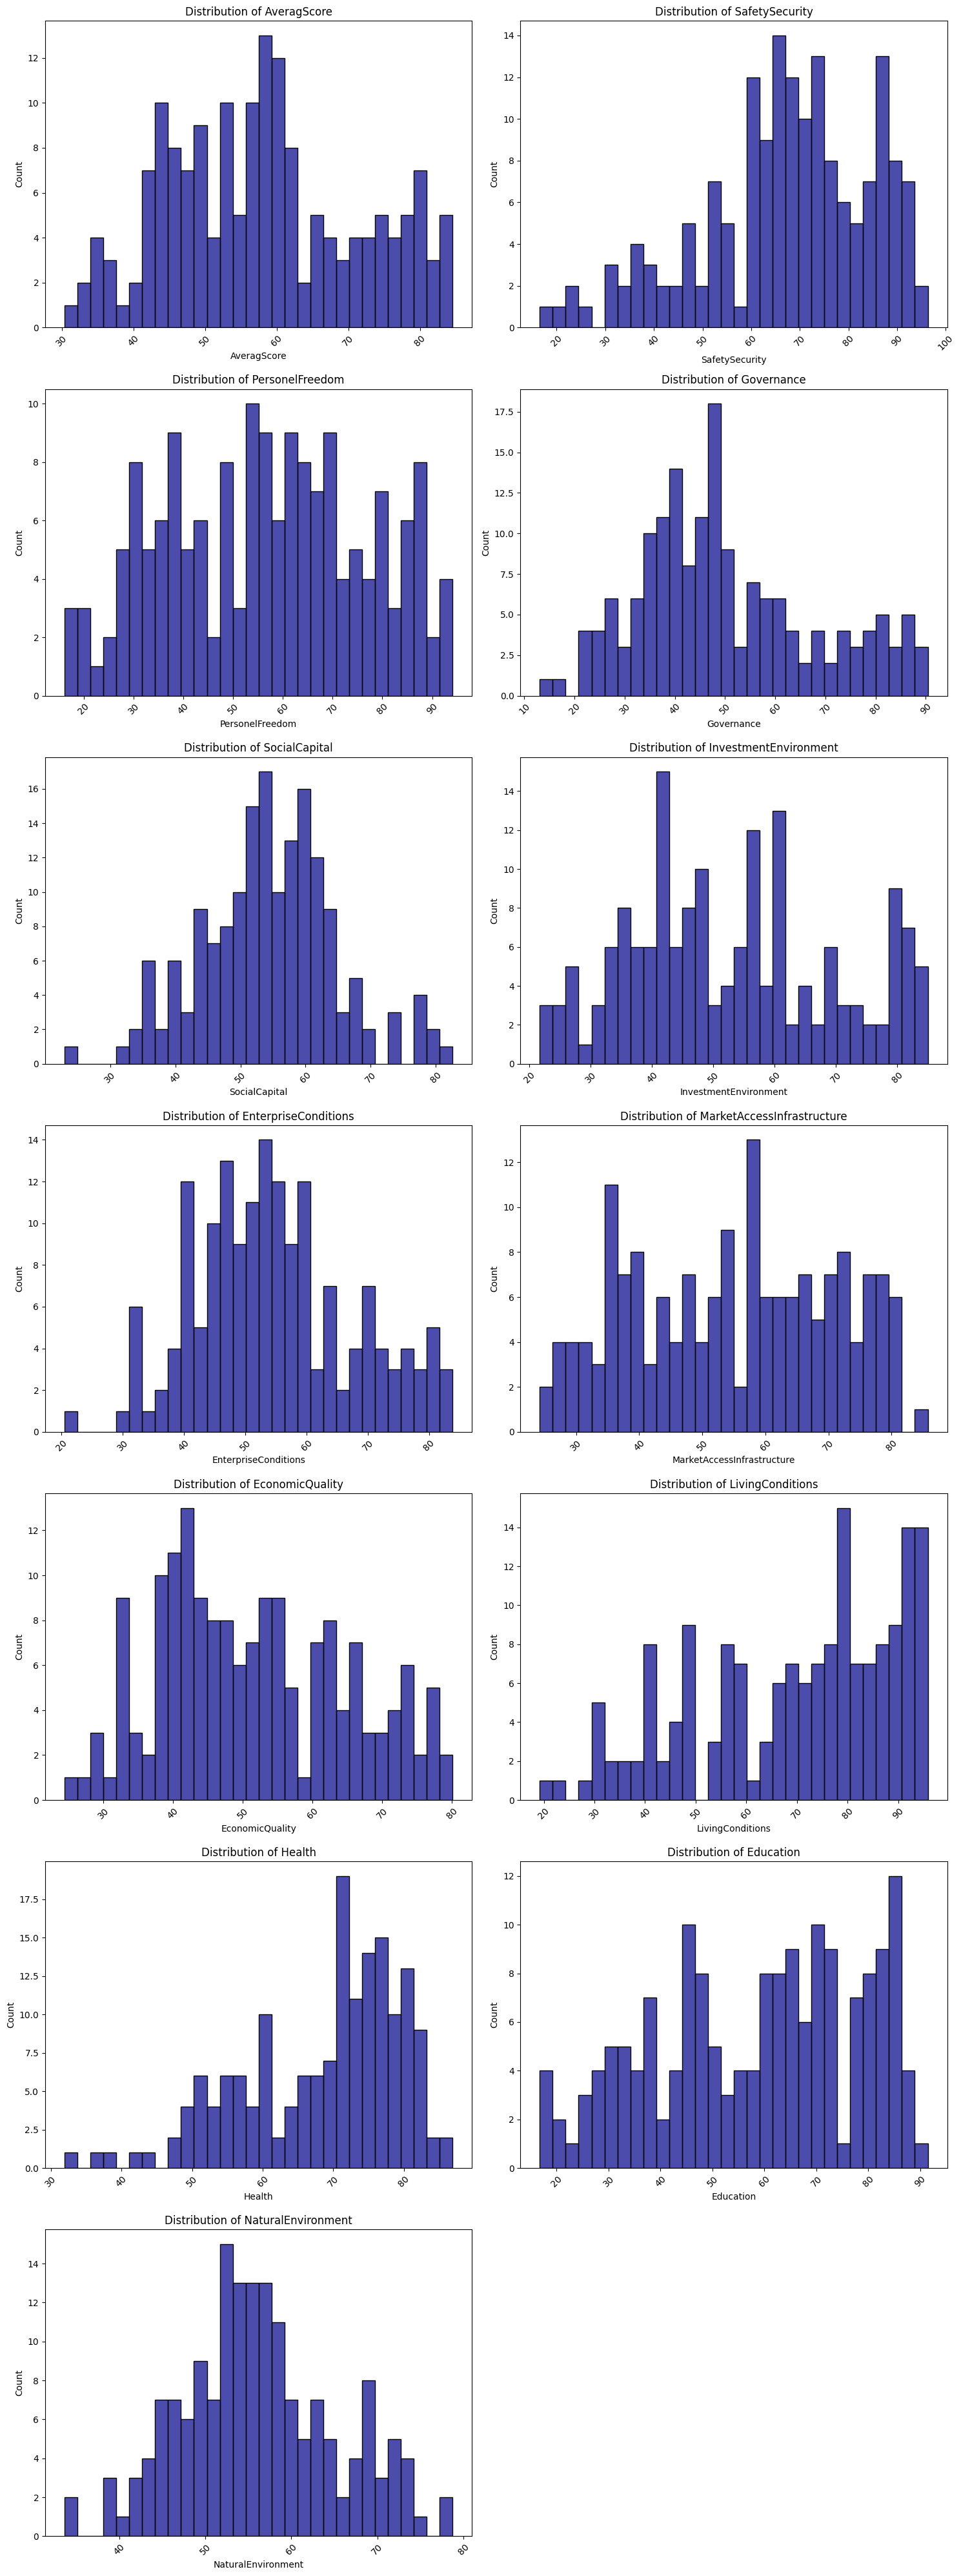

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV
dataf = pd.read_csv('data.csv')
# Drop AveragScore
features = ['SafetySecurity', 'PersonelFreedom', 'Governance',
           'SocialCapital', 'InvestmentEnvironment', 'EnterpriseConditions',
           'MarketAccessInfrastructure', 'EconomicQuality', 'LivingConditions',
           'Health', 'Education', 'NaturalEnvironment']
df = dataf[features]
# Set figure size
plt.figure(figsize=(15, 40))

# Create subplots for each column
for idx, column in enumerate(df.columns[1:], 1): # Skip Country column
   plt.subplot(7, 2, idx)
   sns.histplot(data=df, x=column, bins=30, color='darkblue', alpha=0.7)
   plt.title(f'Distribution of {column}')
   plt.xlabel(column)
   plt.ylabel('Count')
   plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

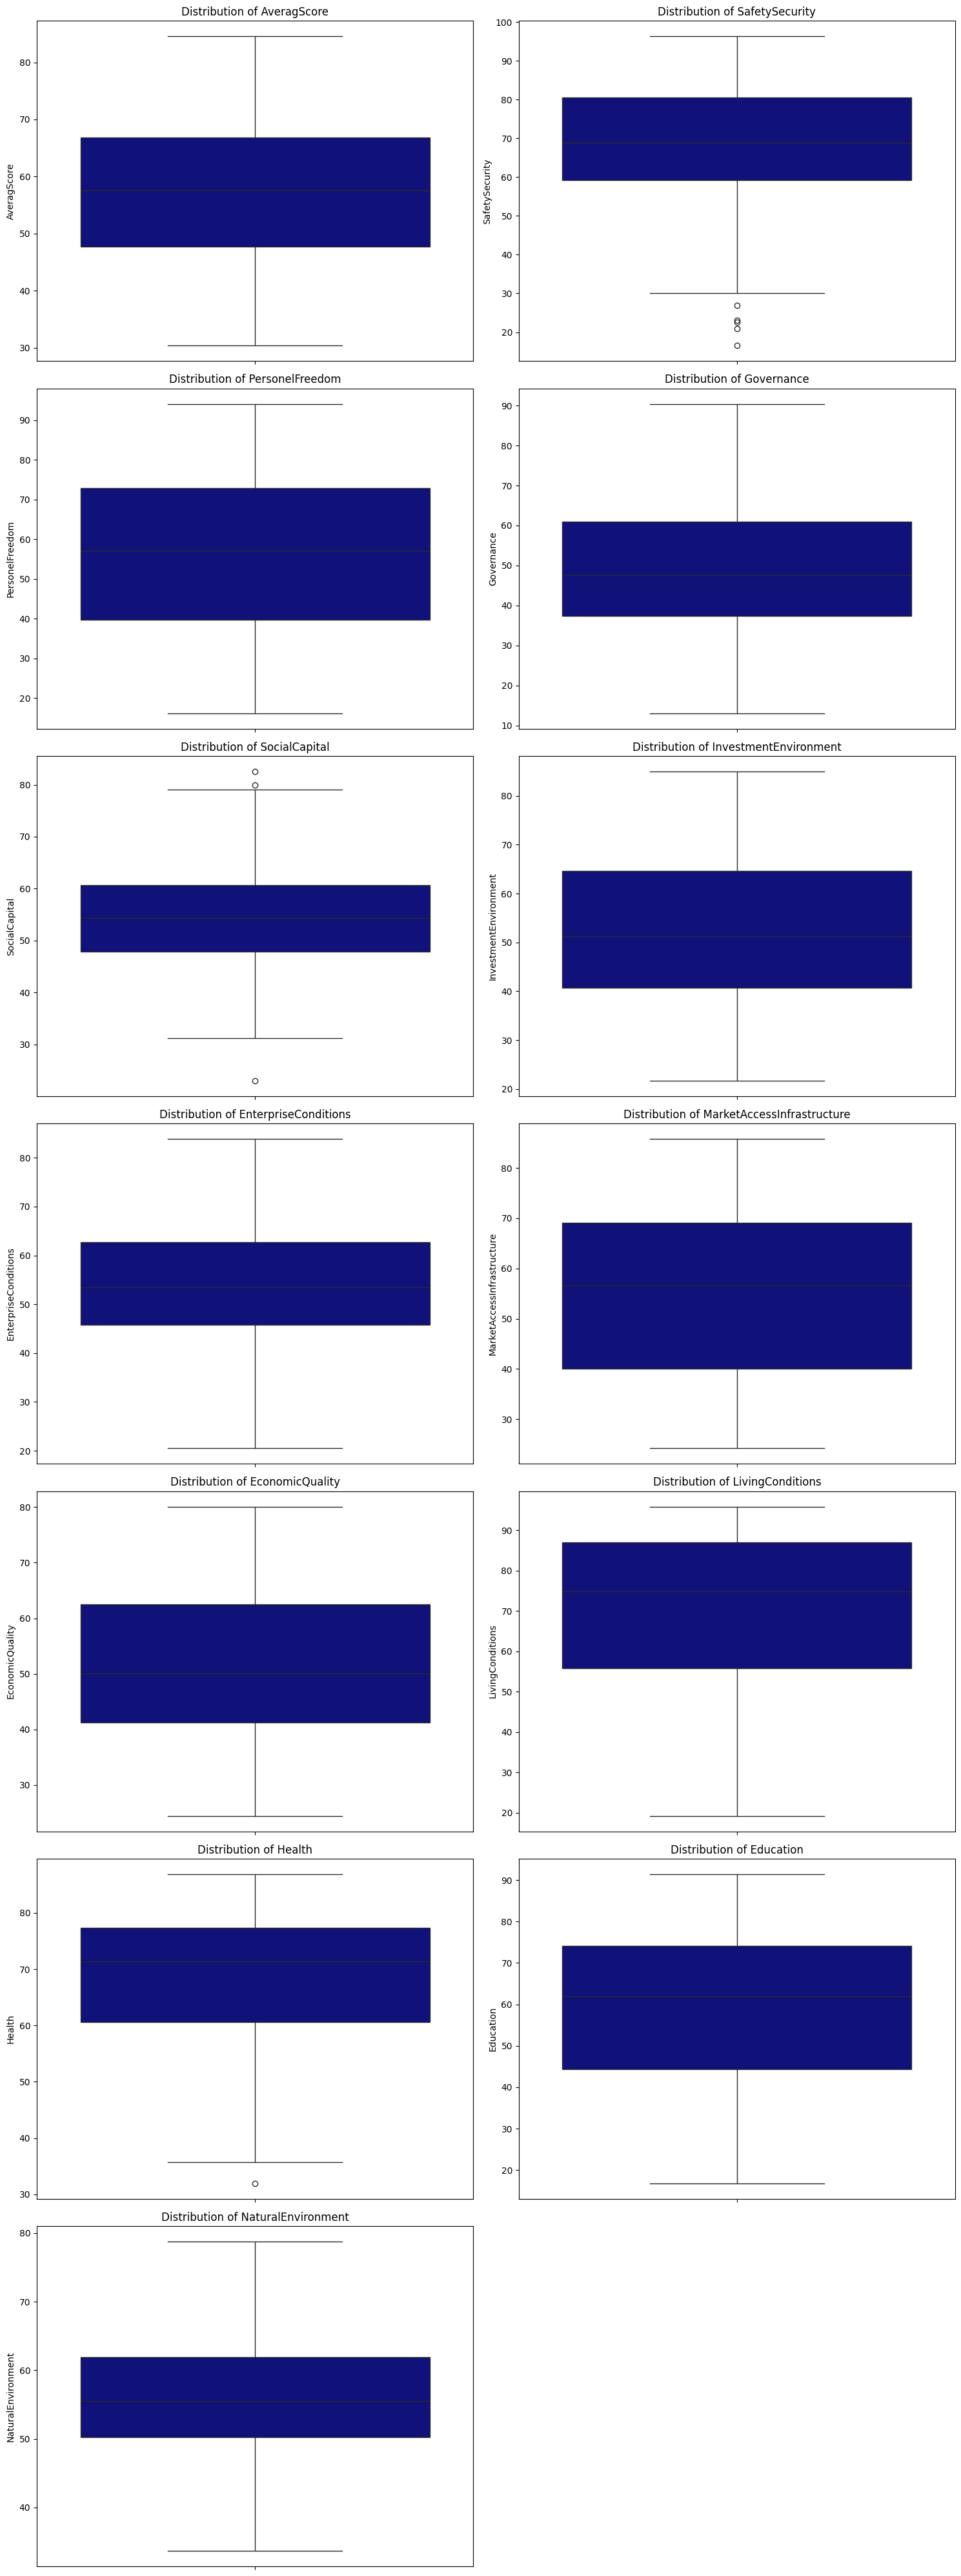

In [ ]:
see import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV
df = pd.read_csv('data.csv')

# Create subplot for all numerical columns
plt.figure(figsize=(15, 40))

# Plot boxplots
for idx, column in enumerate(df.columns[1:], 1): # Skip Country column
   plt.subplot(7, 2, idx)
   sns.boxplot(data=df, y=column, color='darkblue')
   plt.title(f'Distribution of {column}')
   plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

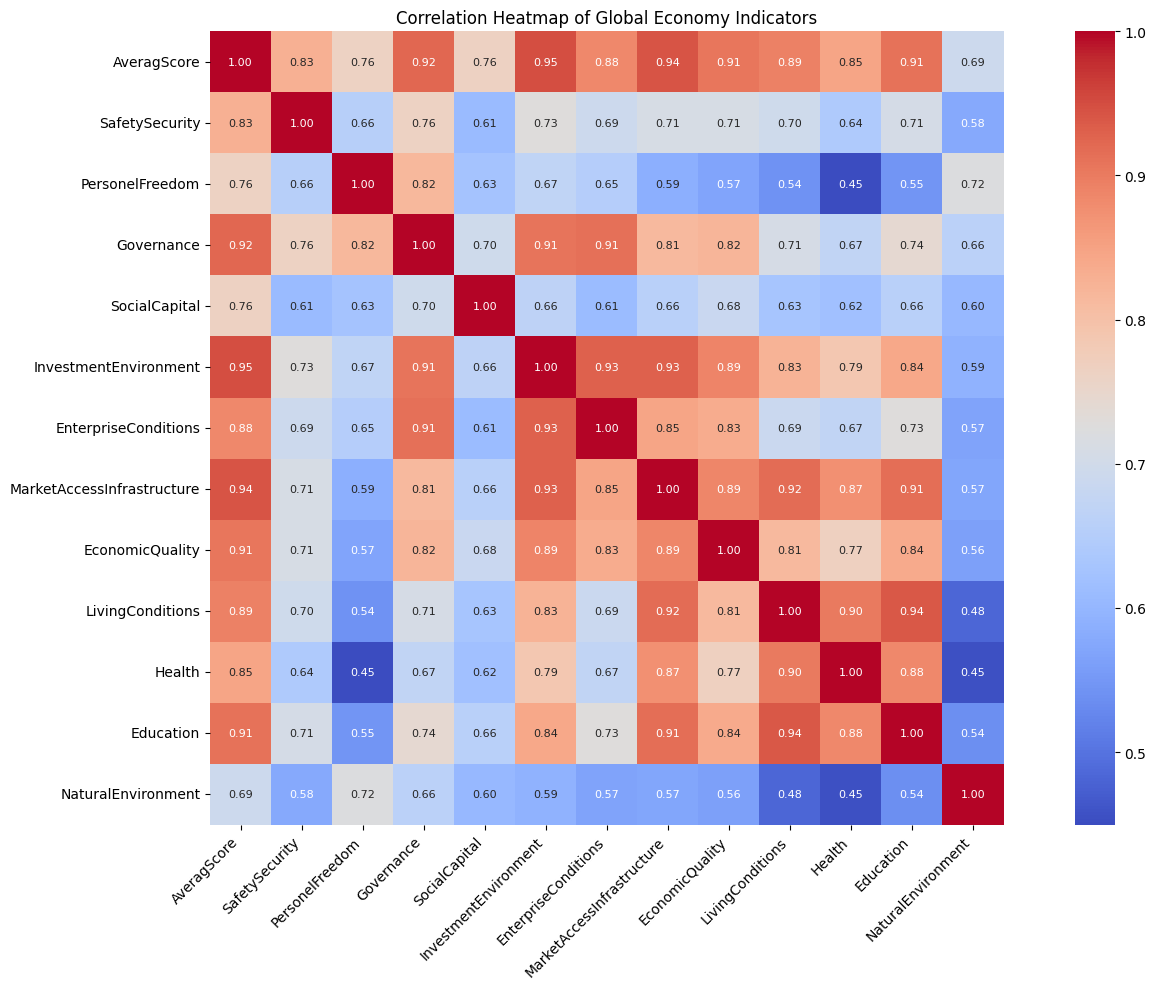

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV
df = pd.read_csv('data.csv')

# Create correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.iloc[:, 1:].corr(),
           annot=True,
           cmap='coolwarm',
           fmt='.2f', lu lu
           square=True,
           annot_kws={'size': 8})

plt.title('Correlation Heatmap of Global Economy Indicators')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

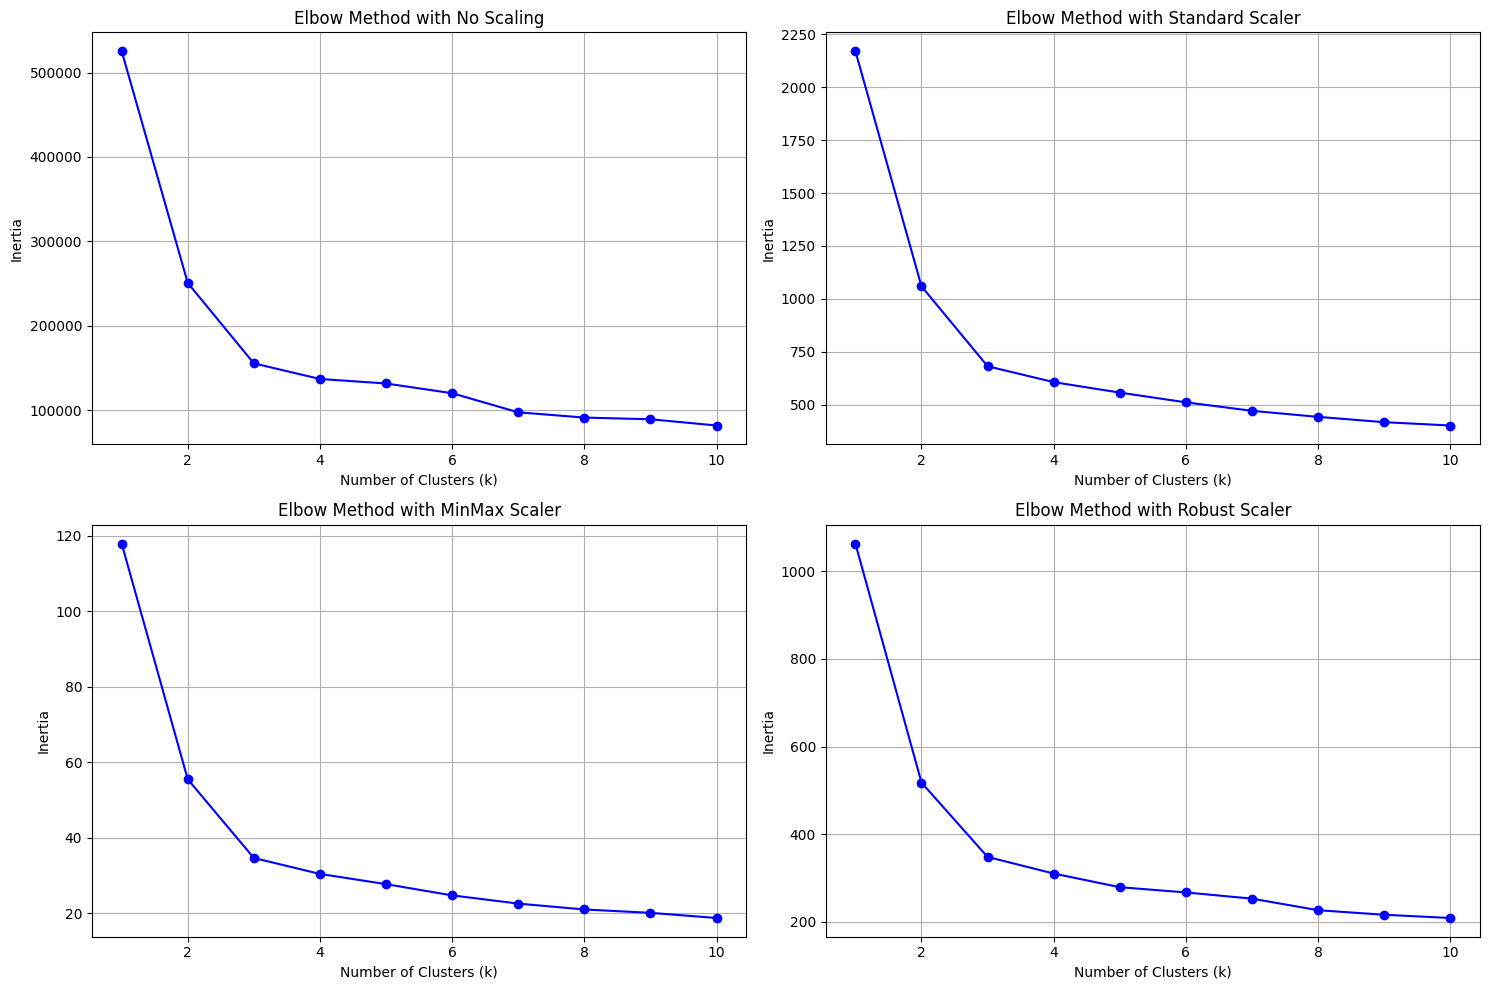

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Read data
df = pd.read_csv('data.csv')

# Prepare data
X = df.select_dtypes(include=[np.number]) # Select numeric columns

# Function to calculate inertia for different k values
def calculate_inertia(data, k_range):
   inertias = []
   silhouette_scores = []

   for k in k_range:
       kmeans = KMeans(n_clusters=k, random_state=42)
       kmeans.fit(data)
       inertias.append(kmeans.inertia_)
       if k > 1:
           silhouette_scores.append(silhouette_score(data, kmeans.labels_))

   return inertias, silhouette_scores

# Plot elbow curves for different scalers
scalers = {
   'No Scaling': None,
   'Standard Scaler': StandardScaler(),
   'MinMax Scaler': MinMaxScaler(),
   'Robust Scaler': RobustScaler()
}

plt.figure(figsize=(15, 10))

for idx, (scaler_name, scaler) in enumerate(scalers.items(), 1):
   # Scale data if scaler exists
   X_scaled = scaler.fit_transform(X) if scaler else X

   # Calculate inertia and silhouette scores
   k_range = range(1, 11)
   inertias, silhouette_scores = calculate_inertia(X_scaled, k_range)

   # Plot
   plt.subplot(2, 2, idx)
   plt.plot(k_range, inertias, 'bo-')
   plt.title(f'Elbow Method with {scaler_name}')
   plt.xlabel('Number of Clusters (k)')
   plt.ylabel('Inertia')
   plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

# Read and prepare data
df = pd.read_csv('data.csv')
X = df.select_dtypes(include=[np.number])

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Apply PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X_scaled)

# Create visualization
fig = px.scatter_3d(
   x=reduced_data[:, 0],
   y=reduced_data[:, 1],
   z=reduced_data[:, 2],
   color=labels,
   title='3D Cluster Visualization (K=3)',
   labels={
       'x': 'First Principal Component',
       'y': 'Second Principal Component',
       'z': 'Third Principal Component'
   },
   color_continuous_scale='viridis'
)

fig.update_traces(marker=dict(size=6))
fig.update_layout(
   scene=dict(
       xaxis_title='PC1',
       yaxis_title='PC2',
       zaxis_title='PC3'
   )
)

fig.show()

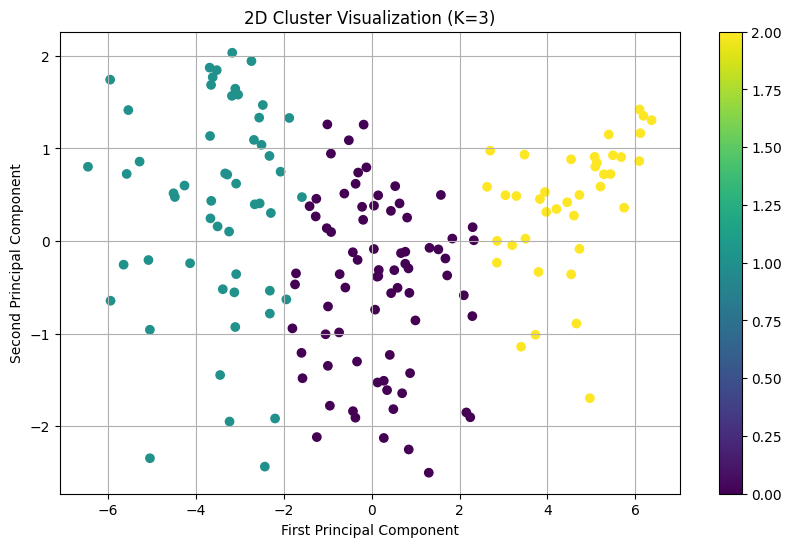

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Read and prepare data
df = pd.read_csv('data.csv')
X = df.select_dtypes(include=[np.number])

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Apply PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Cluster Visualization (K=3)')
plt.grid(True)
plt.show()

For n_clusters = 2, silhouette score: 0.424
For n_clusters = 3, silhouette score: 0.350
For n_clusters = 4, silhouette score: 0.271
For n_clusters = 5, silhouette score: 0.232
For n_clusters = 6, silhouette score: 0.186
For n_clusters = 7, silhouette score: 0.171
For n_clusters = 8, silhouette score: 0.192
For n_clusters = 9, silhouette score: 0.185
For n_clusters = 10, silhouette score: 0.178

Best silhouette score: 0.424 with 2 clusters


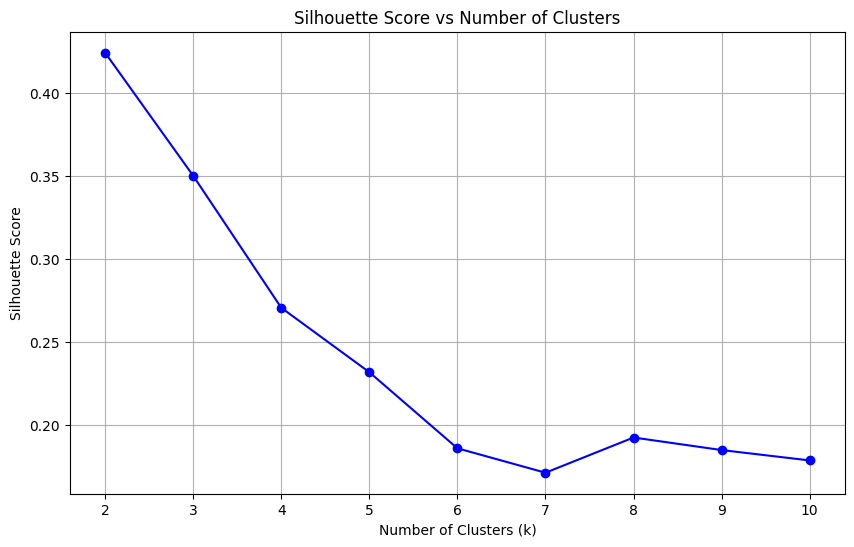

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read and prepare data
df = pd.read_csv('data.csv')
X = df.select_dtypes(include=[np.number])

# Scale data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Calculate silhouette scores
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
   kmeans = KMeans(n_clusters=k, random_state=42)
   kmeans.fit(X_scaled)
   score = silhouette_score(X_scaled, kmeans.labels_)
   silhouette_scores.append(score)
   print(f"For n_clusters = {k}, silhouette score: {score:.3f}")

# Find best k
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\nBest silhouette score: {best_score:.3f} with {best_k} clusters")

# Plot scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()